# Python Color Scopes

In [1]:
#import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time

## Load Image

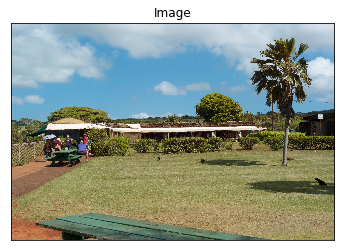

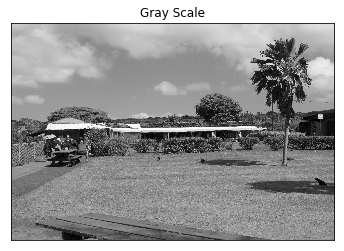

In [2]:
#load images
img_path = 'hawaii29.jpg'
#color version
cimg = cv2.imread(img_path)
#grey scale image
img = cv2.imread(img_path,0)

plt_image = cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB)
plt.imshow(plt_image)
plt.title('Image'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(img, 'gray')
plt.title('Gray Scale'), plt.xticks([]), plt.yticks([])
plt.show()

## Calculate Image Parameters

The image is segmented by a dividing factor to make the processing faster on high resolution images.

In [3]:
img_height = img.shape[0]
img_width = img.shape[1]
div = 8
scope_len = int(img_width/div)
bw_color_scope = np.zeros((256, scope_len+1), dtype=int)

## Black and White Scope

The basic algorithm is done by looping over the values of the image and mapping them to the scope plot one by one. This is really slow and is not practicle. So a faster algorithm is needed. I have left it in the notebook to help the reader understand conceptually how color scopes are built.

In [4]:
#Slow Algorithm

# start = time.time()
# for w in range(img_width):
#     for h in range(img_height):
#         pix_val = -(img[h][w]-255)
#         if bw_color_scope[pix_val][int(w/div)] != 255:
#             bw_color_scope[pix_val][int(w/div)] = bw_color_scope[pix_val][int(w/div)] + 1
# end = time.time()
# print(end - start)

The faster algorithm takes advantage of the numpy matrix processing by slicing the image into sections and performing a unique value and count extraction. These an be then used as the vertical index and pixel intensity respectivly.

In [5]:
#Fast Algorithm

#start = time.time()
for l in range(scope_len):
    vals, cnts = np.unique(img[:,l*div:(l+1)*div], return_counts=True)
    for i in range(len(vals)):
        if cnts[i] < 255:
            bw_color_scope[-(vals[i]-255)][l] = cnts[i]
        else:
            bw_color_scope[-(vals[i]-255)][l] = 255
#end = time.time()
#print(end - start)

Plot the Black and White color scope

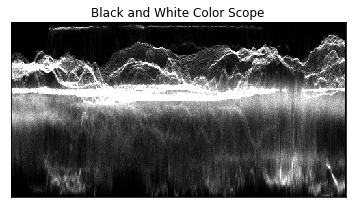

In [6]:
cv2.imwrite('BW_Color_Scope.png', bw_color_scope) 
plt.imshow(bw_color_scope, 'gray')
plt.title('Black and White Color Scope'), plt.xticks([]), plt.yticks([])
plt.show()

## Blue Green Red Color Channel Scopes

In [7]:
#Split the color image into separate channels
b, g, r = cv2.split(cimg)

#create scope matricies
b_color_scope = np.zeros((256, scope_len+1), dtype=int)
g_color_scope = np.zeros((256, scope_len+1), dtype=int)
r_color_scope = np.zeros((256, scope_len+1), dtype=int)
background = np.zeros((256, scope_len+1), dtype=int)

#perform algorithm on each split channel
for l in range(scope_len):
    vals, cnts = np.unique(b[:,l*div:(l+1)*div], return_counts=True)
    for i in range(len(vals)):
        if cnts[i] < 255:
            b_color_scope[-(vals[i]-255)][l] = cnts[i]
        else:
            b_color_scope[-(vals[i]-255)][l] = 255
            
for l in range(scope_len):
    vals, cnts = np.unique(g[:,l*div:(l+1)*div], return_counts=True)
    for i in range(len(vals)):
        if cnts[i] < 255:
            g_color_scope[-(vals[i]-255)][l] = cnts[i]
        else:
            g_color_scope[-(vals[i]-255)][l] = 255
            
for l in range(scope_len):
    vals, cnts = np.unique(r[:,l*div:(l+1)*div], return_counts=True)
    for i in range(len(vals)):
        if cnts[i] < 255:
            r_color_scope[-(vals[i]-255)][l] = cnts[i]
        else:
            r_color_scope[-(vals[i]-255)][l] = 255

Plot the blue color channel as blue by merging the single matrix with all all zeroed channels

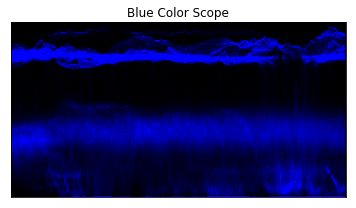

In [8]:
b_show_color_scope = cv2.merge((b_color_scope, background, background))
cv2.imwrite('B_Color_Scope.png', b_show_color_scope)

#blue is last for matplotlib
b_plt_color_scope = cv2.merge((background, background, b_color_scope))
plt.imshow(b_plt_color_scope)
plt.title('Blue Color Scope'), plt.xticks([]), plt.yticks([])
plt.show()

Plot the green color channel as blue by merging the single matrix with all all zeroed channels

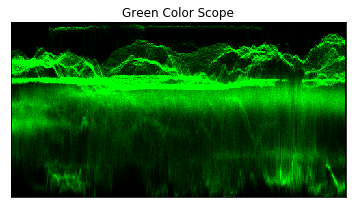

In [9]:
g_show_color_scope = cv2.merge((background, g_color_scope, background))
cv2.imwrite('G_Color_Scope.png', g_show_color_scope)

#green is in the middle
plt.imshow(g_show_color_scope)
plt.title('Green Color Scope'), plt.xticks([]), plt.yticks([])
plt.show()

Plot the red color channel as blue by merging the single matrix with all all zeroed channels

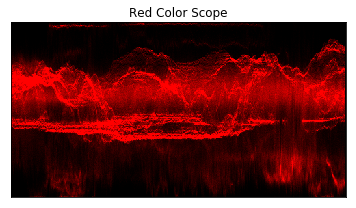

In [10]:
r_show_color_scope = cv2.merge((background, background, r_color_scope))
cv2.imwrite('R_Color_Scope.png', r_show_color_scope)

#red is first for matplotlib
r_plt_color_scope = cv2.merge((r_color_scope, background, background))
plt.imshow(r_plt_color_scope)
plt.title('Red Color Scope'), plt.xticks([]), plt.yticks([])
plt.show()

## Combine the separate channel scopes into a merged waveform

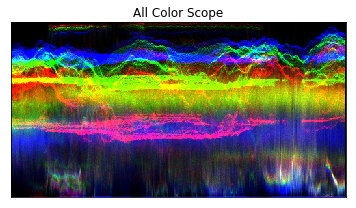

In [11]:
#Combine all Color Scopes
all_show_color_scope = cv2.merge((b_color_scope, g_color_scope, r_color_scope))
cv2.imwrite('All_Color_Scope.png', all_show_color_scope)


all_plt_color_scope = cv2.merge((r_color_scope, g_color_scope, b_color_scope))
plt.imshow(all_plt_color_scope)
plt.title('All Color Scope'), plt.xticks([]), plt.yticks([])
plt.show()